<h2> Analyse Heart Rate data from Fitbit

Load in the csv file of all the 2021 heart rate data collated using the notebook "Heart Rates Load Data"

In [270]:
# declarations and imports

import pandas as pd


In [271]:
# get the raw data from the csv

heart = pd.read_csv(r"C:\Users\darki\Documents\Jupyter\Fitbit Analysis\Heart.csv", encoding="utf-8", parse_dates=True)

In [272]:
# need to convert datetime column as an object to a date column for grouping

heart['dateTime'] = pd.to_datetime(heart['dateTime']).dt.date

In [273]:
# check data

heart.head()

,dateTime,value
0,2021-01-01,62
1,2021-01-01,62
2,2021-01-01,65
3,2021-01-01,68
4,2021-01-01,69


In [274]:
# Try a grouping with stats

heart.groupby(["dateTime"])["value"].agg({"min", "max"})

,min,max
dateTime,,
2021-01-01,50,155
2021-01-02,50,125
2021-01-03,51,128
2021-01-04,51,101
2021-01-05,52,123
...,...,...
2021-10-15,51,122
2021-10-16,52,125
2021-10-17,34,159


<AxesSubplot:title={'center':'Heart Rate'}, xlabel='Period', ylabel='BPM'>

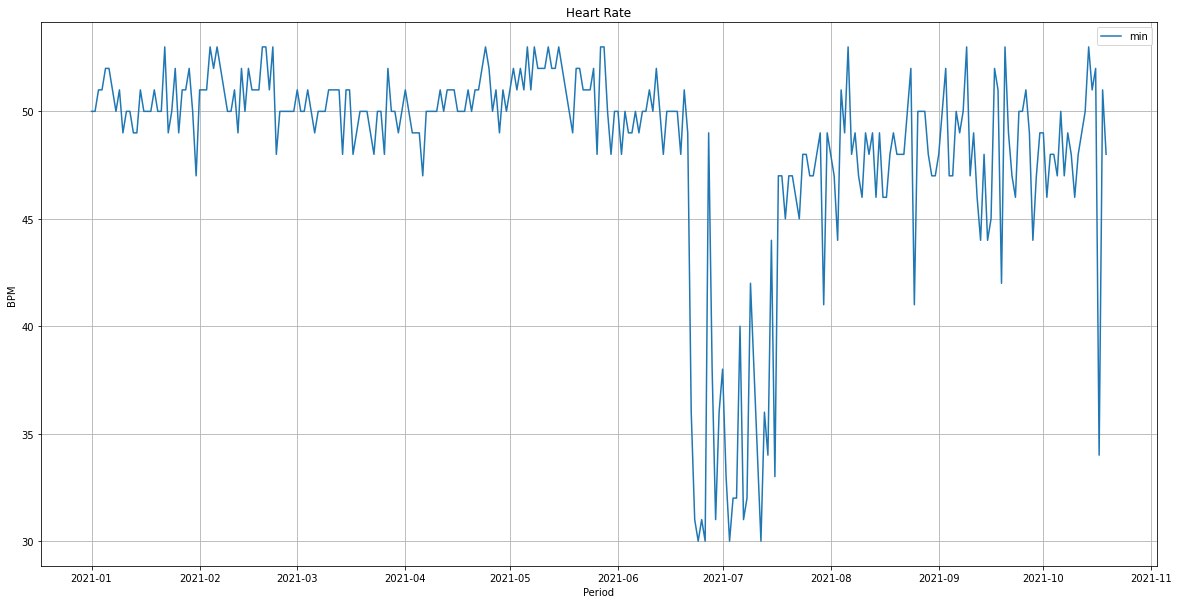

In [275]:
# Plot the results of Max and Min heart rate 

heart.groupby(["dateTime"])["value"].agg({"min"}).plot(title="Heart Rate", figsize = (20,10), 
                                xlabel = "Period", ylabel = "BPM", grid=True)

<AxesSubplot:title={'center':'Heart Rate'}, xlabel='Period', ylabel='BPM'>

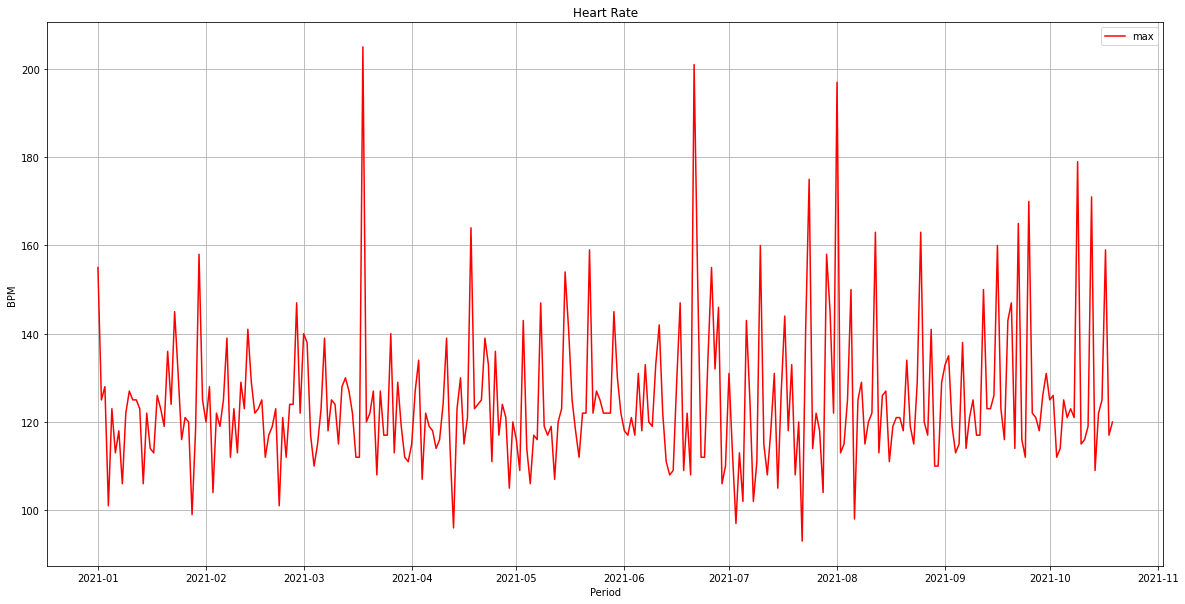

In [276]:
# Plot the results of Max and Min heart rate 

heart.groupby(["dateTime"])["value"].agg({"max"}).plot(title="Heart Rate", figsize = (20,10), 
                                xlabel = "Period", ylabel = "BPM", grid=True, color = "Red")


Now do the same for step data and get into an aggregated dataFrame

In [277]:
# get the raw data from the csv

steps = pd.read_csv(r"C:\Users\darki\Documents\Jupyter\Fitbit Analysis\Steps.csv", encoding="utf-8",parse_dates = True)

In [278]:
# check the data

steps.head()

,dateTime,value
0,2021-01-13 00:12:00,450
1,2021-01-13 00:16:00,1660
2,2021-01-13 06:06:00,1590
3,2021-01-13 06:14:00,1130
4,2021-01-13 06:15:00,1130


In [279]:
# need to convert datetime column as an object to a date column for grouping

steps['dateTime'] = pd.to_datetime(steps['dateTime']).dt.date

In [280]:
# recheck the data

steps.head()

,dateTime,value
0,2021-01-13,450
1,2021-01-13,1660
2,2021-01-13,1590
3,2021-01-13,1130
4,2021-01-13,1130


<h3> Now look at splitting data by day of year

In [281]:
# convert value column into km as a new column and also add a month column

steps["day"] = pd.to_datetime(steps['dateTime']).dt.dayofyear
heart["day"] = pd.to_datetime(heart['dateTime']).dt.dayofyear


# also convert cm into km
steps["km"] = (steps["value"]  / 100000) 



In [282]:
# view the results

steps.head()

,dateTime,value,day,km
0,2021-01-13,450,13,0.0045
1,2021-01-13,1660,13,0.0166
2,2021-01-13,1590,13,0.0159
3,2021-01-13,1130,13,0.0113
4,2021-01-13,1130,13,0.0113


In [283]:
heart.head()

,dateTime,value,day
0,2021-01-01,62,1
1,2021-01-01,62,1
2,2021-01-01,65,1
3,2021-01-01,68,1
4,2021-01-01,69,1


In [284]:
# aggregate the km column by day of year performing a sum calculation

monthsteps = steps.groupby(["day"])["km"].agg({"sum"}) 

# aggregate the heart rate column by day of year performing a sum calculation

monthheart = heart.groupby(["day"])["value"].agg({"min"}) 

In [285]:
# convert the aggregated km into steps using the assumption of 1300 steps per km based off using the fitbit on walks for 6 years

monthsteps["sum"] = monthsteps["sum"] * 1300

In [286]:
# view the final data set

monthsteps.head()

,sum
day,
13,8229.65
14,1787.63
15,8793.46
16,2653.04
17,9188.14


In [287]:
monthheart.head()

,min
day,
1,50
2,50
3,51
4,51
5,52


<AxesSubplot:title={'center':'Steps'}, xlabel='Period', ylabel='Steps'>

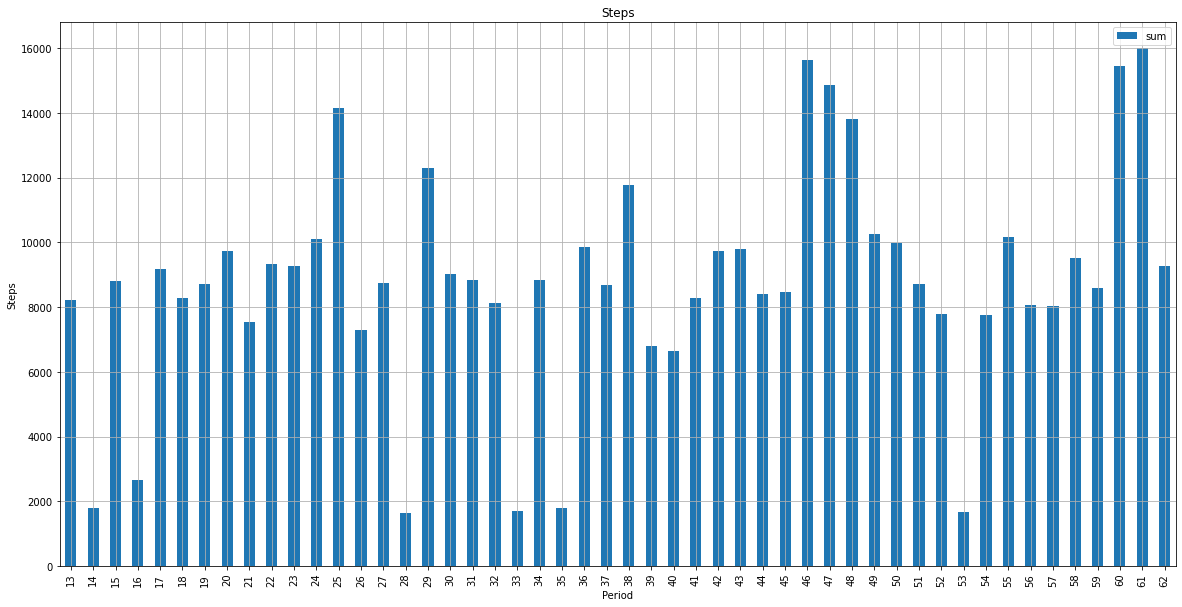

In [288]:
# plot a bar chart of step count by day of year (50 days only)

monthsteps.head(50).plot(title="Steps", figsize = (20,10), 
             xlabel = "Period", ylabel = "Steps", grid=True, kind="bar")

Next we need to combine datasets and see if step count affects min heart rate

In [289]:
readings = monthheart.merge(monthsteps, left_index=True, right_index=True)

In [290]:
readings.head()

,min,sum
day,,
13,49,8229.65
14,49,1787.63
15,51,8793.46
16,50,2653.04
17,50,9188.14


In [291]:
readings.rename(columns = {'min':'min_bpm', 'sum':'steps'}, inplace = True)

In [292]:
readings.head()

,min_bpm,steps
day,,
13,49,8229.65
14,49,1787.63
15,51,8793.46
16,50,2653.04
17,50,9188.14


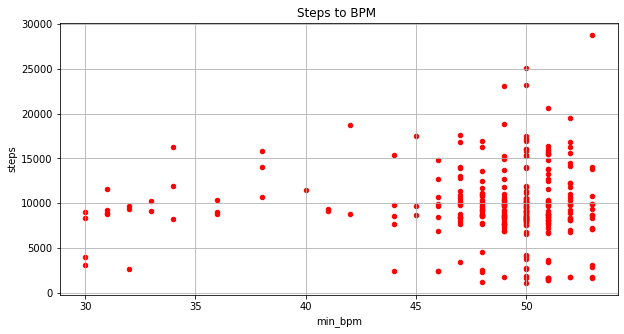

In [296]:
charttitle = "Steps to BPM "

ax1 = readings.plot.scatter(figsize = (10,5), x="min_bpm", y="steps", c="Red", grid = True, title = charttitle )

In [294]:
# how many readings used

readings.count()

min_bpm    280
steps      280
dtype: int64